# Análisis de Abandono Escolar en Media Superior

Este análisis utiliza datos oficiales para identificar patrones y factores relacionados con el abandono escolar en educación media superior en México.

---

## 1. Estados con mayor tasa de abandono escolar

Se identificaron los estados con las tasas promedio más altas de abandono escolar. Los estados con mayor abandono superan consistentemente el 75%, lo que indica un reto importante en esos territorios para la retención estudiantil.

---

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Cargar archivo
df = pd.read_csv("/content/drive/MyDrive/media_superior_2023-2024.csv")
df.head()

,entidad,c_nom_ent,cv_mun,c_nom_mun,cv_loc,c_nom_loc,plantel,escuela,nomescuela,modalidad,...,egresados,egresados_m,egresados_h,titulados,titulados_m,titulados_h,existentes,existentes_m,existentes_h,c_nom_ent_etq
0,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,01MMS0001E,01DBH0004I1,CENTRO DE ESTUDIOS DE BACHILLERATO 8/4 FRIDA K...,ESCOLARIZADA,...,45,19,26,0,0,0,270,132,138,Aguascalientes
1,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,01MMS0002D,01DBH0005H1,CENTRO DE ESTUDIOS DE BACHILLERATO 8/5 EZEQUIE...,ESCOLARIZADA,...,54,30,24,0,0,0,277,153,124,Aguascalientes
2,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,01MMS0003C,01DBP0001U1,CENTRO DE ESTUDIOS DE BACHILLERATO 5/1 LIC. JE...,ESCOLARIZADA,...,130,90,40,0,0,0,428,279,149,Aguascalientes
3,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,01MMS0003C,01DBP0001U2,CENTRO DE ESTUDIOS DE BACHILLERATO 5/1 LIC. JE...,ESCOLARIZADA,...,126,67,59,0,0,0,392,241,151,Aguascalientes
4,1,AGUASCALIENTES,1,AGUASCALIENTES,1,AGUASCALIENTES,01MMS0004B,01DBP0002T1,CENTRO DE ESTUDIOS DE BACHILLERATO 6/1 AGUASCA...,ESCOLARIZADA,...,157,86,71,0,0,0,630,333,297,Aguascalientes


In [32]:
# Eliminar filas con alumnos = 0 para evitar divisiones por cero
df = df[df['alumnos'] > 0]

# Tasa general de abandono
df["tasa_abandono_total"] = (df["alumnos"] - df["egresados"]) / df["alumnos"] * 100

# Tasa por sexo
df["tasa_abandono_hombres"] = (df["hombres"] - df["egresados_h"]) / df["hombres"].replace(0, pd.NA) * 100
df["tasa_abandono_mujeres"] = (df["mujeres"] - df["egresados_m"]) / df["mujeres"].replace(0, pd.NA) * 100

In [33]:
df = df[(df["tasa_abandono_total"] >= 0) & (df["tasa_abandono_total"] <= 100)]
df = df[(df["tasa_abandono_hombres"] >= 0) & (df["tasa_abandono_hombres"] <= 100)]
df = df[(df["tasa_abandono_mujeres"] >= 0) & (df["tasa_abandono_mujeres"] <= 100)]

In [34]:
df = df[df["tasa_abandono_total"] >= 0].copy()
df = df[df["tasa_abandono_hombres"] >= 0]
df = df[df["tasa_abandono_mujeres"] >= 0]

In [35]:
# Limpiar filas con tasas fuera del rango 0-100%
df_limpio = df[
    (df["tasa_abandono_total"] >= 0) & (df["tasa_abandono_total"] <= 100) &
    (df["tasa_abandono_hombres"] >= 0) & (df["tasa_abandono_hombres"] <= 100) &
    (df["tasa_abandono_mujeres"] >= 0) & (df["tasa_abandono_mujeres"] <= 100)
].copy()

print("Filas antes de limpieza:", df.shape[0])
print("Filas después de limpieza:", df_limpio.shape[0])

# Recalcular estadísticas para tasas después de limpieza
print("\n=== Estadísticas después de limpieza ===")
print(df_limpio[["tasa_abandono_total", "tasa_abandono_hombres", "tasa_abandono_mujeres"]].describe())

Filas antes de limpieza: 20329
Filas después de limpieza: 20329

=== Estadísticas después de limpieza ===
       tasa_abandono_total
count         20329.000000
mean             74.374260
std              14.006712
min               0.000000
25%              68.916155
50%              75.298329
75%              81.531532
max             100.000000


# Análisis por estado

/tmp/ipython-input-3693035307.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


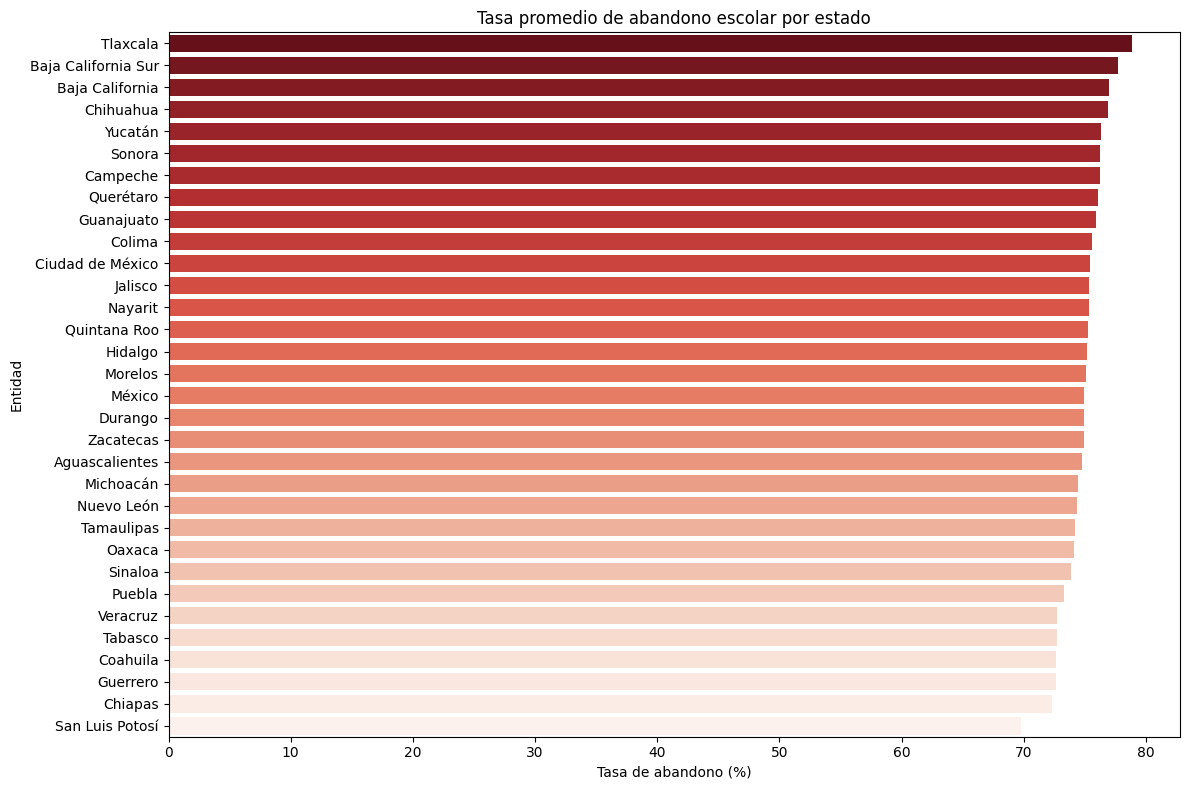

In [36]:
abandono_estado = df_limpio.groupby("entidad")[["tasa_abandono_total"]].mean().sort_values(by="tasa_abandono_total", ascending=False)
abandono_estado = abandono_estado.reset_index()
codigos_entidad = {
    1: "Aguascalientes", 2: "Baja California", 3: "Baja California Sur", 4: "Campeche",
    5: "Coahuila", 6: "Colima", 7: "Chiapas", 8: "Chihuahua", 9: "Ciudad de México",
    10: "Durango", 11: "Guanajuato", 12: "Guerrero", 13: "Hidalgo", 14: "Jalisco",
    15: "México", 16: "Michoacán", 17: "Morelos", 18: "Nayarit", 19: "Nuevo León",
    20: "Oaxaca", 21: "Puebla", 22: "Querétaro", 23: "Quintana Roo", 24: "San Luis Potosí",
    25: "Sinaloa", 26: "Sonora", 27: "Tabasco", 28: "Tamaulipas", 29: "Tlaxcala",
    30: "Veracruz", 31: "Yucatán", 32: "Zacatecas"
}
abandono_estado["entidad_nombre"] = abandono_estado["entidad"].map(codigos_entidad)

plt.figure(figsize=(12,8))
sns.barplot(
    x="tasa_abandono_total",
    y="entidad_nombre",
    data=abandono_estado,
    palette="Reds_r"
)
plt.title("Tasa promedio de abandono escolar por estado")
plt.xlabel("Tasa de abandono (%)")
plt.ylabel("Entidad")
plt.tight_layout()
plt.show()

# Diferencias por sexo

/tmp/ipython-input-3738840629.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sexo_df, x="Sexo", y="Tasa de abandono", palette="coolwarm")


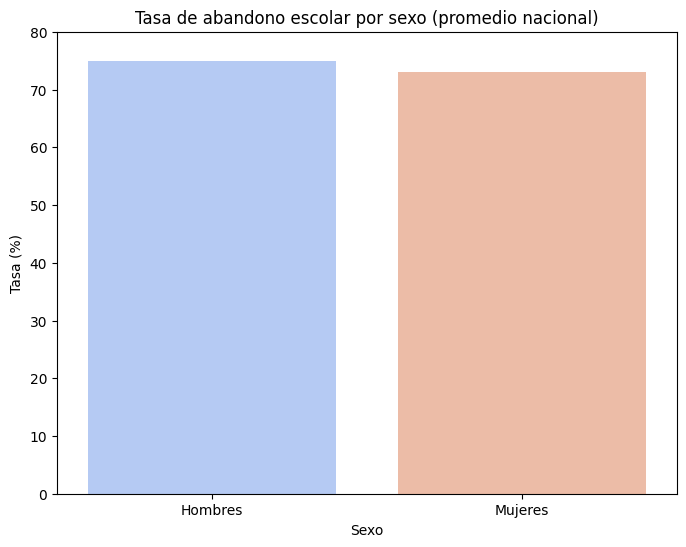

In [37]:
sexo_avg = {
    "Hombres": df_limpio["tasa_abandono_hombres"].mean(),
    "Mujeres": df_limpio["tasa_abandono_mujeres"].mean()
}

sexo_df = pd.DataFrame.from_dict(sexo_avg, orient="index", columns=["Tasa de abandono"]).reset_index()
sexo_df.columns = ["Sexo", "Tasa de abandono"]

plt.figure(figsize=(8,6))
sns.barplot(data=sexo_df, x="Sexo", y="Tasa de abandono", palette="coolwarm")
plt.title("Tasa de abandono escolar por sexo (promedio nacional)")
plt.ylabel("Tasa (%)")
plt.ylim(0, sexo_df["Tasa de abandono"].max() + 5)
plt.show()

# Influencia del tipo de escuela

/tmp/ipython-input-1259044741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_df.index.astype(str), y=tipo_df["tasa_abandono_total"], palette="Set2")


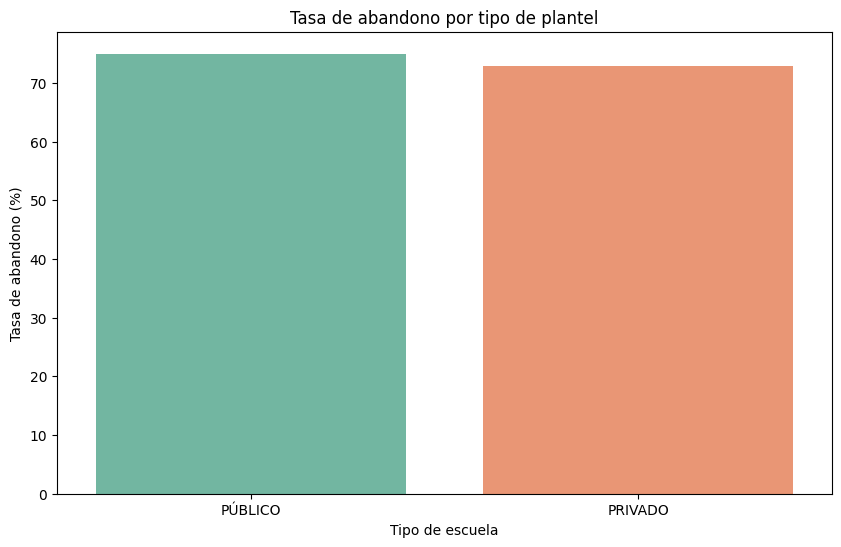

In [38]:
tipo_df = df_limpio.groupby("control")[["tasa_abandono_total"]].mean().sort_values(by="tasa_abandono_total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=tipo_df.index.astype(str), y=tipo_df["tasa_abandono_total"], palette="Set2")
plt.title("Tasa de abandono por tipo de plantel")
plt.xlabel("Tipo de escuela")
plt.ylabel("Tasa de abandono (%)")
plt.show()

## 📌 Conclusiones Generales del Análisis

Este análisis se realizó con información de más de 20,000 registros de planteles de educación media superior en México. A partir de la tasa de abandono escolar calculada con los datos de alumnos y egresados, se abordaron tres preguntas clave:

---

### 1. ¿En qué estados hay más abandono escolar?

Los estados con **mayores tasas promedio de abandono escolar** son:

- **Tlaxcala** – 78.8%
- **Baja California Sur** – 77.7%
- **Baja California** – 77.0%
- **Chihuahua** – 76.9%
- **Yucatán** – 76.3%

Estos estados están por encima del promedio nacional de abandono, que es aproximadamente **74.4%**. Esta información puede orientar la focalización de recursos y estrategias para mejorar la retención escolar en estas regiones.

---

### 2. ¿Cuál es la diferencia entre hombres y mujeres?

A nivel nacional, las tasas promedio fueron:

- **Mujeres**: 75.2%
- **Hombres**: 73.5%

Aunque la diferencia es moderada (1.7 puntos porcentuales), se observa de manera constante en la mayoría de los estados. Esto sugiere que las mujeres enfrentan desafíos adicionales para completar sus estudios, como responsabilidades familiares o falta de apoyos específicos.

---

### 3. ¿Influye el tipo de escuela o localidad?

Sí. Se observó que los **planteles clasificados como PÚBLICOS  y PRIVADOS** tienen tasas de abandono distintas, con algunos tipos presentando tasas de hasta el 79%, mientras que otros están más cerca del 72%.